In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.integrate import solve_ivp

### 3 Legeme-problemet: Solve-IVP vs. egen numerisk step-løsning ###

De 3 bevægelsesligninger:
\begin{align}
\ddot{\vec{r}_1}&=-Gm_2\frac{\vec{r}_1-\vec{r}_2}{|\vec{r}_1-\vec{r}_2|^3}-Gm_3\frac{\vec{r}_1-\vec{r}_3}{|\vec{r}_1-\vec{r}_3|^3}\\
\ddot{\vec{r}_2}&=-Gm_3\frac{\vec{r}_2-\vec{r}_3}{|\vec{r}_2-\vec{r}_3|^3}-Gm_1\frac{\vec{r}_2-\vec{r}_1}{|\vec{r}_2-\vec{r}_1|^3}\\
\ddot{\vec{r}_3}&=-Gm_1\frac{\vec{r}_3-\vec{r}_1}{|\vec{r}_3-\vec{r}_1|^3}-Gm_2\frac{\vec{r}_3-\vec{r}_2}{|\vec{r}_3-\vec{r}_2|^3}\\
\end{align}

Anvender symmetrisk differentiering, hvor:
\begin{align}
f'(x)&=\lim_{h\to 0}\frac{f(x+h)-f(x-h)}{2h}\\
f''(x)&=\lim_{h\to 0}\frac{f(x+h)-2f(x)+f(x-h)}{h^2}
\end{align}

som kan diskretiseres ved:
\begin{align}
f'(x_{i})&=\frac{f(x_{i+1})-f(x_{i-1})}{2h}\\
f''(x_{i})&=\frac{f(x_{i+1})-2f(x_i)+f(x_{i-1})}{h^2}
\end{align}

hvorved vores differentialligningsystem bliver reduceret til:
\begin{align}
\vec{r1}_{i+1}&=-h^2Gm_2\frac{\vec{r1}_i-\vec{r2}_i}{|\vec{r1}_i-\vec{r2}_i|^3}-h^2Gm_3\frac{\vec{r1}_i-\vec{r3}_i}{|\vec{r1}_i-\vec{r3}_i|^3}+2\vec{r1}_i-\vec{r1}_{i-1}\\
\vec{r2}_{i+1}&=-h^2Gm_3\frac{\vec{r2}_i-\vec{r3}_i}{|\vec{r2}_i-\vec{r3}_i|^3}-h^2Gm_1\frac{\vec{r2}_i-\vec{r1}_i}{|\vec{r2}_i-\vec{r1}_i|^3}+2\vec{r2}_i-\vec{r2}_{i-1}\\
\vec{r3}_{i+1}&=-h^2Gm_1\frac{\vec{r3}_i-\vec{r1}_i}{|\vec{r3}_i-\vec{r1}_i|^3}-h^2Gm_2\frac{\vec{r3}_i-\vec{r2}_i}{|\vec{r3}_i-\vec{r2}_i|^3}+2\vec{r3}_i-\vec{r3}_{i-1}\\
\end{align}

In [9]:
### FUNCTION(S) ###
def force_pair(r1,r2,m2,Grav_const,Step_size):
    numerator   = r1-r2 
    denominator = norm(r1-r2)**3
    fraction    = numerator/denominator
    return Step_size**2*Grav_const*m2*fraction

In [10]:
### SIMULATION CONFIGURATIONS ###
Stepsize = 1e-5
Step_factor = 1
Nr_steps = 100000*Step_factor
Nr_particles = 3

In [11]:
### INITIAL CONDITIONS ###
m1, m2, m3 = 1, 1, 1
Grav_const = 1
r1, r2, r3 = np.array([0,0,0]), np.array([0.5,0,0]), np.array([1,0,0])
v1, v2, v3 = np.array([0,0,0]), np.array([0,1,0]), np.array([-0.5,0.5,0])

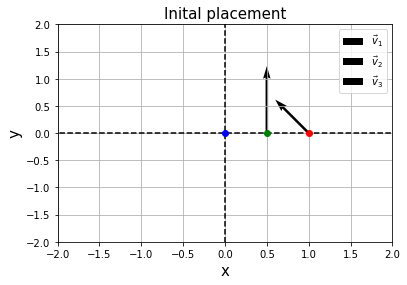

In [12]:

### Plotting initial placement ### 
plt.plot(r1[0],r1[1],'o',color='b'), plt.plot(r2[0],r2[1],'o',color='g'), plt.plot(r3[0],r3[1],'o',color='r')
plt.grid(), plt.hlines(0,-100,100,ls='--'),plt.vlines(0,-100,100,ls='--')
plt.quiver(r1[0],r1[1],v1[0],v1[1], scale=5, label = r'$\vec{v}_1$')
plt.quiver(r2[0],r2[1],v2[0],v2[1], scale=5, label = r'$\vec{v}_2$')
plt.quiver(r3[0],r3[1],v3[0],v3[1], scale=5, label = r'$\vec{v}_3$')
plt.xlim(-2,2), plt.ylim(-2,2), plt.xlabel('x',size=15), plt.ylabel('y',size=15)
plt.title('Inital placement', size =15), plt.legend()
plt.show()

In [16]:

#################################################################### EGEN NUMERISK STEP-LØSNING ############################################################################

### First step ### 

r1_stepped, r2_stepped, r3_stepped = r1+v1*Stepsize,r2+v2*Stepsize,r3+v3*Stepsize

x1, y1, z1 = [], [], []
x2, y2, z2 = [], [], []
x3, y3, z3 = [], [], []

x1.append(r1[0]),y1.append(r1[1]),z1.append(r1[2])
x2.append(r2[0]),y2.append(r2[1]),z2.append(r2[2])
x3.append(r3[0]),y3.append(r3[1]),z3.append(r3[2])

x1.append(r1_stepped[0]),y1.append(r1_stepped[1]),z1.append(r1_stepped[2])
x2.append(r2_stepped[0]),y2.append(r2_stepped[1]),z2.append(r2_stepped[2])
x3.append(r3_stepped[0]),y3.append(r3_stepped[1]),z3.append(r3_stepped[2])


### Running numerical solver ###
counter = 0
for i in range(Nr_steps-1):
    ### Defining i-1 ###
    r1_previous, r2_previous, r3_previous = np.array([x1[i],y1[i],z1[i]]), np.array([x2[i],y2[i],z2[i]]), np.array([x3[i],y3[i],z3[i]])   
    
    ### Defining i ###
    r1_current, r2_current, r3_current = np.array([x1[i+1],y1[i+1],z1[i+1]]), np.array([x2[i+1],y2[i+1],z2[i+1]]), np.array([x3[i+1],y3[i+1],z3[i+1]]) 
   
    ### Defining i+1 ###
    r1_new = -force_pair(r1_current, r2_current,m2,Grav_const,Stepsize)-force_pair(r1_current, r3_current,m3,Grav_const,Stepsize)+2*r1_current-r1_previous
    r2_new = -force_pair(r2_current, r3_current,m3,Grav_const,Stepsize)-force_pair(r2_current, r1_current,m1,Grav_const,Stepsize)+2*r2_current-r2_previous
    r3_new = -force_pair(r3_current, r1_current,m1,Grav_const,Stepsize)-force_pair(r3_current, r2_current,m2,Grav_const,Stepsize)+2*r3_current-r3_previous
    
    ### Appending calulated values to list ### 
    x1.append(r1_new[0]),y1.append(r1_new[1]),z1.append(r1_new[2])
    x2.append(r2_new[0]),y2.append(r2_new[1]),z2.append(r2_new[2])
    x3.append(r3_new[0]),y3.append(r3_new[1]),z3.append(r3_new[2])


    if round(((i+1)/Nr_steps)*100) > round(((i)/Nr_steps)*100):
        counter += 1
        if counter == 5:
            print(f'{round(((i+1)/Nr_steps)*100)} %')
            counter = 0

#################################################################### NUMERISK SOLVE-IVP LØSNING ############################################################################


### SIMULATION CONFIGURATIONS ###

tinit = 0
tfinal = Step_factor
trange = [tinit,tfinal]
ts = np.linspace(tinit, tfinal, 100000)

### INITIAL CONDITIONS ###
G = Grav_const
y_init = np.concatenate([r1,v1,r2,v2,r3,v3])


def dydt(t,y):
    r1     = y[0:3]
    r1_dot = y[3:6]
    r2     = y[6:9]
    r2_dot = y[9:12]
    r3     = y[12:15]
    r3_dot = y[15:18]
    
    d_r1_dt = r1_dot
    d_r2_dt = r2_dot
    d_r3_dt = r3_dot
    
    d_r1_dot_dt = -G*m2*((r1-r2)/(norm(r1-r2)**3))-G*m3*((r1-r3)/(norm(r1-r3)**3))
    d_r2_dot_dt = -G*m3*((r2-r3)/(norm(r2-r3)**3))-G*m1*((r2-r1)/(norm(r2-r1)**3))
    d_r3_dot_dt = -G*m1*((r3-r1)/(norm(r3-r1)**3))-G*m2*((r3-r2)/(norm(r3-r2)**3))
    
    return np.concatenate([d_r1_dt,d_r1_dot_dt,d_r2_dt,d_r2_dot_dt,d_r3_dt,d_r3_dot_dt])

mysol = solve_ivp(dydt, trange, y_init, t_eval = ts,rtol=3e-14)

time_vals = mysol.t

r1_x, r1_y = mysol.y[0], mysol.y[1]
v1_x, v1_y = mysol.y[3], mysol.y[4]

r2_x, r2_y = mysol.y[6], mysol.y[7]
v2_x, v2_y = mysol.y[9], mysol.y[10]

r3_x, r3_y = mysol.y[12], mysol.y[13]
v3_x, v3_y = mysol.y[15], mysol.y[16]


5 %
10 %
15 %
20 %
25 %
30 %
35 %
40 %
45 %
50 %
55 %
60 %
65 %
70 %
75 %
80 %
85 %
90 %
95 %
100 %


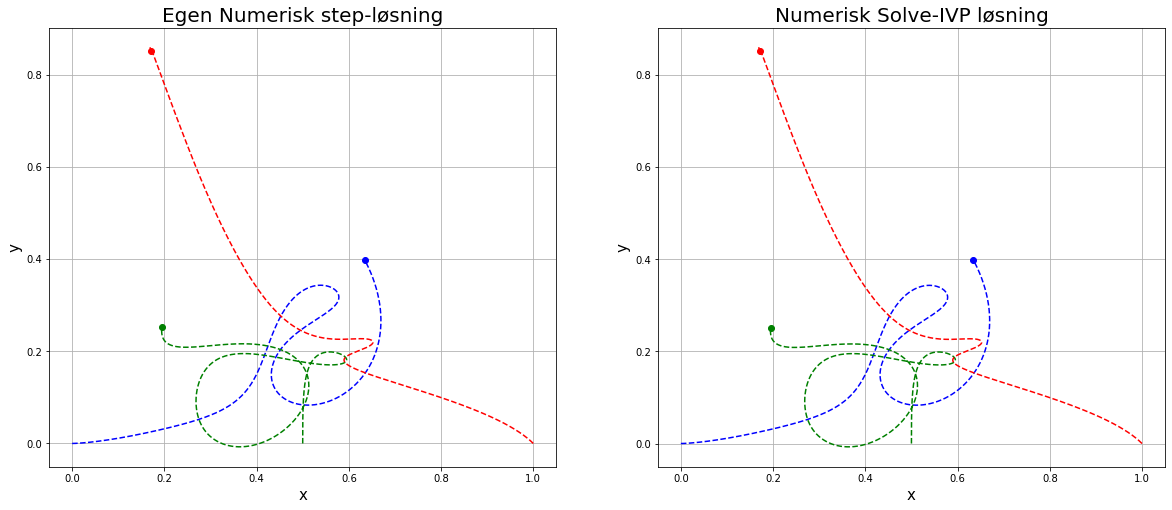

In [17]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].plot(x1,y1,ls='--',color='b'), ax[0].plot(x2,y2,ls='--',color='g'),ax[0].plot(x3,y3,ls='--',color='r'), ax[0].grid(), ax[0].set_title('Egen Numerisk step-løsning',size=20)
ax[0].plot(x1[-1],y1[-1],'o',color='b'), ax[0].plot(x2[-1],y2[-1],'o',color='g'), ax[0].plot(x3[-1],y3[-1],'o',color='r')
ax[0].set_aspect('equal'), ax[0].set_xlabel('x',size=15),  ax[0].set_ylabel('y',size=15)

ax[1].plot(r1_x,r1_y,ls='--',color='b'), ax[1].plot(r2_x,r2_y,ls='--',color='g'), ax[1].plot(r3_x,r3_y,ls='--',color='r'), ax[1].grid(), ax[1].set_title('Numerisk Solve-IVP løsning',size=20)
ax[1].set_aspect('equal'), ax[1].set_xlabel('x',size=15),  ax[1].set_ylabel('y',size=15)
ax[1].plot(r1_x[-1],r1_y[-1],'o',color='b'), ax[1].plot(r2_x[-1],r2_y[-1],'o',color='g'), ax[1].plot(r3_x[-1],r3_y[-1],'o',color='r')

plt.show()

### Runge Kutte 4-ordens ###

De 3 koblede 2-ordens differentialligninger der definerer den indbyrdes bevægelse for 3 legemer påvirket af hinandens tyngdefelt:
\begin{align}
\ddot{\vec{r}_1}&=-Gm_2\frac{\vec{r}_1-\vec{r}_2}{|\vec{r}_1-\vec{r}_2|^3}-Gm_3\frac{\vec{r}_1-\vec{r}_3}{|\vec{r}_1-\vec{r}_3|^3}\\
\ddot{\vec{r}_2}&=-Gm_3\frac{\vec{r}_2-\vec{r}_3}{|\vec{r}_2-\vec{r}_3|^3}-Gm_1\frac{\vec{r}_2-\vec{r}_1}{|\vec{r}_2-\vec{r}_1|^3}\\
\ddot{\vec{r}_3}&=-Gm_1\frac{\vec{r}_3-\vec{r}_1}{|\vec{r}_3-\vec{r}_1|^3}-Gm_2\frac{\vec{r}_3-\vec{r}_2}{|\vec{r}_3-\vec{r}_2|^3}\\
\end{align}

kan omskrives til 6 koblede 1-ordens differentialligninger ved:
\begin{align}
\dot{\vec{r}_1}&=\vec{v_1}\\
\dot{\vec{v}_1}&=-Gm_2\frac{\vec{r}_1-\vec{r}_2}{|\vec{r}_1-\vec{r}_2|^3}-Gm_3\frac{\vec{r}_1-\vec{r}_3}{|\vec{r}_1-\vec{r}_3|^3}\\
\dot{\vec{r}_2}&=\vec{v_2}\\
\dot{\vec{v}_2}&=-Gm_3\frac{\vec{r}_2-\vec{r}_3}{|\vec{r}_2-\vec{r}_3|^3}-Gm_1\frac{\vec{r}_2-\vec{r}_1}{|\vec{r}_2-\vec{r}_1|^3}\\
\dot{\vec{v}_3}&=\vec{v_3}\\
\dot{\vec{v}_3}&=-Gm_1\frac{\vec{r}_3-\vec{r}_1}{|\vec{r}_3-\vec{r}_1|^3}-Gm_2\frac{\vec{r}_3-\vec{r}_2}{|\vec{r}_3-\vec{r}_2|^3}\\
\end{align}

med givne startbetingelser $\vec{r}1_0,\vec{r}2_0,\vec{r}3_0$ og $\vec{v}1_0,\vec{v}2_0,\vec{v}3_0$. Differentialligningssystemet
kan altså her betragtes som et system på formen:

\begin{align}
\dot{\vec{r}_1}&=f_1(\vec{v}_1)\\
\dot{\vec{v}_1}&=f_2(\vec{r}_1,\vec{r}_2,\vec{r}_3)\\
\dot{\vec{r}_2}&=f_3(\vec{v}_2)\\
\dot{\vec{v}_2}&=f_4(\vec{r}_1,\vec{r}_2,\vec{r}_3)\\
\dot{\vec{v}_3}&=f_5(\vec{v}_3)\\
\dot{\vec{v}_3}&=f_6(\vec{r}_1,\vec{r}_2,\vec{r}_3)\\
\end{align}

hvorpå der kan anvendes 4-ordens Runge-kutta:

                                                                    -- Første konstant --

\begin{align}
A_0 &= \Delta t f_2(\vec{r_i}_1,\vec{r_i}_2,\vec{r_i}_3),\quad B_0 = \Delta t f_4(\vec{r_i}_1,\vec{r_i}_2,\vec{r_i}_3)\\
C_0 &= \Delta t f_6(\vec{r_i}_1,\vec{r_i}_2,\vec{r_i}_3),\quad D_0 = \Delta t f_1(\vec{v_i}_1)\\
E_0 &= \Delta t f_3(\vec{v_i}_2),\quad \quad \quad \quad\,\, F_0 = \Delta t f_5(\vec{v_i}_3)\\
\end{align}

                                                                    -- Anden konstant --

\begin{align}
A_1 &= \Delta t f_2\bigg(\vec{r_i}_1+\frac{D_0}{2},\vec{r_i}_2+\frac{E_0}{2},\vec{r_i}_3+\frac{F_0}{2}\bigg),\quad B_1 = \Delta t f_4\bigg(\vec{r_i}_1+\frac{D_0}{2},\vec{r_i}_2+\frac{E_0}{2},\vec{r_i}_+\frac{F_0}{2}3\bigg)\\
C_1 &= \Delta t f_6\bigg(\vec{r_i}_1+\frac{D_0}{2},\vec{r_i}_2+\frac{E_0}{2},\vec{r_i}_3+\frac{F_0}{2}\bigg),\quad D_1 = \Delta t f_1\bigg(\vec{v_i}_1+\frac{A_0}{2}\bigg)\\
E_1 &= \Delta t f_3\bigg(\vec{v_i}_2+\frac{B_0}{2}\bigg),\quad \quad \quad \quad \quad \quad \quad \quad \quad  F_1 = \Delta t f_5\bigg(\vec{v_i}_3+\frac{C_0}{2}\bigg)\\
\end{align}

                                                                    -- Tredje konstant --

\begin{align}
A_2 &= \Delta t f_2\bigg(\vec{r_i}_1+\frac{D_1}{2},\vec{r_i}_2+\frac{E_1}{2},\vec{r_i}_3+\frac{F_1}{2}\bigg),\quad B_2 = \Delta t f_4\bigg(\vec{r_i}_1+\frac{D_1}{2},\vec{r_i}_2+\frac{E_1}{2},\vec{r_i}_+\frac{F_1}{2}3\bigg)\\
C_2 &= \Delta t f_6\bigg(\vec{r_i}_1+\frac{D_1}{2},\vec{r_i}_2+\frac{E_1}{2},\vec{r_i}_3+\frac{F_1}{2}\bigg),\quad D_2 = \Delta t f_1\bigg(\vec{v_i}_1+\frac{A_1}{2}\bigg)\\
E_2 &= \Delta t f_3\bigg(\vec{v_i}_2+\frac{B_1}{2}\bigg),\quad \quad \quad \quad \quad \quad \quad \quad \quad  F_2 = \Delta t f_5\bigg(\vec{v_i}_3+\frac{C_1}{2}\bigg)\\
\end{align}

                                                                    -- Fjerde konstant --

\begin{align}
A_3 &= \Delta t f_2\big(\vec{r_i}_1+D_2,\vec{r_i}_2+E_2,\vec{r_i}_3+F_2\big),\quad B_3 = \Delta t f_4\big(\vec{r_i}_1+D_2,\vec{r_i}_2+E_2,\vec{r_i}_3+F_2\big)\\
C_3 &= \Delta t f_6\big(\vec{r_i}_1+D_2,\vec{r_i}_2+E_2,\vec{r_i}_3+F_2\big),\quad D_3 = \Delta t f_1\big(\vec{v_i}_1+A_2\big)\\
E_3 &= \Delta t f_3\big(\vec{v_i}_2+B_2\big),\quad \quad \quad \quad \quad \quad \quad \quad \quad  F_3 = \Delta t f_5\big(\vec{v_i}_3+C_2\big)\\
\end{align}

og man kan finde step i+1 som:

\begin{align}
\vec{r_{i+1,}}_1 &= \vec{r_i}_1+\frac{1}{6}\bigg(D_0+2D_1+2D_2+D_3\bigg)\\
\vec{r_{i+1,}}_2 &= \vec{r_i}_2+\frac{1}{6}\bigg(E_0+2E_1+2E_2+E_3\bigg)\\
\vec{r_{i+1,}}_3 &= \vec{r_i}_3+\frac{1}{6}\bigg(F_0+2F_1+2F_2+F_3\bigg)\\
\vec{v_{i+1,}}_1 &= \vec{v_i}_1+\frac{1}{6}\bigg(A_0+2A_1+2A_2+A_3\bigg)\\
\vec{v_{i+1,}}_2 &= \vec{v_i}_2+\frac{1}{6}\bigg(B_0+2B_1+2B_2+B_3\bigg)\\
\vec{v_{i+1,}}_3 &= \vec{v_i}_3+\frac{1}{6}\bigg(C_0+2C_1+2C_2+C_3\bigg)\\
\end{align}

In [18]:
### FUNCTION(S) ###
def force_pair1(r1,r2,m2,Grav_const):
    numerator   = r1-r2 
    denominator = norm(r1-r2)**3
    fraction    = numerator/denominator
    return Grav_const*m2*fraction

### dv/dt functions ###
def dvdt1(r_1,r_2,r_3,G,m_1,m_2,m_3):
    first = force_pair1(r_1,r_2,m_2,G)
    second = force_pair1(r_1,r_3,m_3,G)
    return -first-second

def dvdt2(r_1,r_2,r_3,G,m_1,m_2,m_3):
    first = force_pair1(r_2,r_3,m_3,G)
    second = force_pair1(r_2,r_1,m_1,G)
    return -first-second

def dvdt3(r_1,r_2,r_3,G,m_1,m_2,m_3):
    first = force_pair1(r_3,r_1,m_1,G)
    second = force_pair1(r_3,r_2,m_2,G)
    return -first-second

### dr/dt functions ###
def drdt1(v_1):
    return v_1

def drdt2(v_2):
    return v_2

def drdt3(v_3):
    return v_3

### r_i+1 and v_i+1 functions ###
def r_i1(r_i,k0,k1,k2,k3):
    return r_i+1/6*(k0+2*k1+2*k2+k3)

def v_i1(v_i,k0,k1,k2,k3):
    return v_i+1/6*(k0+2*k1+2*k2+k3)

In [19]:
#### INITIAL CONFIGURATIONS ####
Time_interval = [0,2]
Nr_steps = int(1e5)
Step_size = (Time_interval[1]-Time_interval[0])/Nr_steps

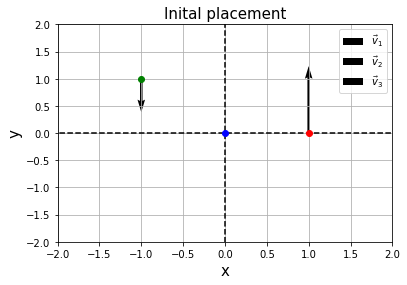

In [20]:
### INITIAL CONDITIONS ###
m1, m2, m3 = 1, 1, 1
Grav_const = 1
r1, r2, r3 = np.array([0,0,0]), np.array([-1,1,0]), np.array([1,0,0])
v1, v2, v3 = np.array([0,0,0]), np.array([0,-0.5,0]), np.array([0,1,0])

### Plotting initial placement ### 
plt.plot(r1[0],r1[1],'o',color='b'), plt.plot(r2[0],r2[1],'o',color='g'), plt.plot(r3[0],r3[1],'o',color='r')
plt.grid(), plt.hlines(0,-100,100,ls='--'),plt.vlines(0,-100,100,ls='--')
plt.quiver(r1[0],r1[1],v1[0],v1[1], scale=5, label = r'$\vec{v}_1$')
plt.quiver(r2[0],r2[1],v2[0],v2[1], scale=5, label = r'$\vec{v}_2$')
plt.quiver(r3[0],r3[1],v3[0],v3[1], scale=5, label = r'$\vec{v}_3$')
plt.xlim(-2,2), plt.ylim(-2,2), plt.xlabel('x',size=15), plt.ylabel('y',size=15)
plt.title('Inital placement', size =15), plt.legend()
plt.show()

In [21]:
#################################################################### NUMERISK RK4 LØSNING ############################################################################


x_1, y_1, z_1 = [], [], []
x_2, y_2, z_2 = [], [], []
x_3, y_3, z_3 = [], [], []

x_1.append(r1[0]),y_1.append(r1[1]),z_1.append(r1[2])
x_2.append(r2[0]),y_2.append(r2[1]),z_2.append(r2[2])
x_3.append(r3[0]),y_3.append(r3[1]),z_3.append(r3[2])

vx_1, vy_1, vz_1 = [], [], []
vx_2, vy_2, vz_2 = [], [], []
vx_3, vy_3, vz_3 = [], [], []

vx_1.append(v1[0]),vy_1.append(v1[1]),vz_1.append(v1[2])
vx_2.append(v2[0]),vy_2.append(v2[1]),vz_2.append(v2[2])
vx_3.append(v3[0]),vy_3.append(v3[1]),vz_3.append(v3[2])

counter = 0
for i in range(Nr_steps):
    #### Defining v_i and r_i for all three bodies ###
    r1, r2, r3 = np.array([x_1[i],y_1[i],z_1[i]]), np.array([x_2[i],y_2[i],z_2[i]]), np.array([x_3[i],y_3[i],z_3[i]])
    v1, v2, v3 = np.array([vx_1[i],vy_1[i],vz_1[i]]), np.array([vx_2[i],vy_2[i],vz_2[i]]), np.array([vx_3[i],vy_3[i],vz_3[i]]) 
    
    #### K0 Calculations ####
    A_0, B_0, C_0 = Step_size*dvdt1(r1,r2,r3,G,m1,m2,m3), Step_size*dvdt2(r1,r2,r3,G,m1,m2,m3), Step_size*dvdt3(r1,r2,r3,G,m1,m2,m3)
    D_0, E_0, F_0 = Step_size*drdt1(v1), Step_size*drdt2(v2), Step_size*drdt3(v3)

    #### K1 Calculations ####
    A_1 = Step_size*dvdt1(r1+D_0/2,r2+E_0/2,r3+F_0/2,G,m1,m2,m3)
    B_1 = Step_size*dvdt2(r1+D_0/2,r2+E_0/2,r3+F_0/2,G,m1,m2,m3)
    C_1 = Step_size*dvdt3(r1+D_0/2,r2+E_0/2,r3+F_0/2,G,m1,m2,m3)
    D_1, E_1, F_1 = Step_size*drdt1(v1+A_0/2),  Step_size*drdt2(v2+B_0/2),  Step_size*drdt3(v3+C_0/2)

    #### K2 Calculations ####
    A_2 = Step_size*dvdt1(r1+D_1/2,r2+E_1/2,r3+F_1/2,G,m1,m2,m3)
    B_2 = Step_size*dvdt2(r1+D_1/2,r2+E_1/2,r3+F_1/2,G,m1,m2,m3)
    C_2 = Step_size*dvdt3(r1+D_1/2,r2+E_1/2,r3+F_1/2,G,m1,m2,m3)
    D_2, E_2, F_2 = Step_size*drdt1(v1+A_1/2),  Step_size*drdt2(v2+B_1/2),  Step_size*drdt3(v3+C_1/2)

    #### K3 Calculations ####
    A_3 = Step_size*dvdt1(r1+D_2,r2+E_2,r3+F_2,G,m1,m2,m3)
    B_3 = Step_size*dvdt2(r1+D_2,r2+E_2,r3+F_2,G,m1,m2,m3)
    C_3 = Step_size*dvdt3(r1+D_2,r2+E_2,r3+F_2,G,m1,m2,m3)
    D_3, E_3, F_3 = Step_size*drdt1(v1+A_2),  Step_size*drdt2(v2+B_2),  Step_size*drdt3(v3+C_2)
    
    #### r:i+1 and v_i+1 calculations ####
    r1_i1, r2_i1, r3_i1 = r_i1(r1,D_0,D_1,D_2,D_3), r_i1(r2,E_0,E_1,E_2,E_3), r_i1(r3,F_0,F_1,F_2,F_3)
    v1_i1, v2_i1, v3_i1 = v_i1(v1,A_0,A_1,A_2,A_3), v_i1(v2,B_0,B_1,B_2,B_3), v_i1(v3,C_0,C_1,C_2,C_3)
    
    #### Appending values ####
    x_1.append(r1_i1[0]),y_1.append(r1_i1[1]),z_1.append(r1_i1[2])
    x_2.append(r2_i1[0]),y_2.append(r2_i1[1]),z_2.append(r2_i1[2])
    x_3.append(r3_i1[0]),y_3.append(r3_i1[1]),z_3.append(r3_i1[2])
    
    vx_1.append(v1_i1[0]),vy_1.append(v1_i1[1]),vz_1.append(v1_i1[2])
    vx_2.append(v2_i1[0]),vy_2.append(v2_i1[1]),vz_2.append(v2_i1[2])
    vx_3.append(v3_i1[0]),vy_3.append(v3_i1[1]),vz_3.append(v3_i1[2])
    
    if round(((i+1)/Nr_steps)*100) > round(((i)/Nr_steps)*100):
        counter += 1
        if counter == 10:
            print(f'{round(((i+1)/Nr_steps)*100)} %')
            counter = 0
            
#################################################################### NUMERISK SOLVE-IVP LØSNING ############################################################################


### SIMULATION CONFIGURATIONS ###

tinit = 0
tfinal = Time_interval[1]
trange = [tinit,tfinal]
ts = np.linspace(tinit, tfinal, 100000)

### INITIAL CONDITIONS ###
G = Grav_const
r1, r2, r3 = np.array([0,0,0]), np.array([-1,1,0]), np.array([1,0,0])
v1, v2, v3 = np.array([0,0,0]), np.array([0,-0.5,0]), np.array([0,1,0])
y_init = np.concatenate([r1,v1,r2,v2,r3,v3])


def dydt(t,y):
    r1     = y[0:3]
    r1_dot = y[3:6]
    r2     = y[6:9]
    r2_dot = y[9:12]
    r3     = y[12:15]
    r3_dot = y[15:18]
    
    d_r1_dt = r1_dot
    d_r2_dt = r2_dot
    d_r3_dt = r3_dot
    
    d_r1_dot_dt = -G*m2*((r1-r2)/(norm(r1-r2)**3))-G*m3*((r1-r3)/(norm(r1-r3)**3))
    d_r2_dot_dt = -G*m3*((r2-r3)/(norm(r2-r3)**3))-G*m1*((r2-r1)/(norm(r2-r1)**3))
    d_r3_dot_dt = -G*m1*((r3-r1)/(norm(r3-r1)**3))-G*m2*((r3-r2)/(norm(r3-r2)**3))
    
    return np.concatenate([d_r1_dt,d_r1_dot_dt,d_r2_dt,d_r2_dot_dt,d_r3_dt,d_r3_dot_dt])

mysol = solve_ivp(dydt, trange, y_init, t_eval = ts,rtol=3e-14)

time_vals = mysol.t

r1_x, r1_y = mysol.y[0], mysol.y[1]
v1_x, v1_y = mysol.y[3], mysol.y[4]

r2_x, r2_y = mysol.y[6], mysol.y[7]
v2_x, v2_y = mysol.y[9], mysol.y[10]

r3_x, r3_y = mysol.y[12], mysol.y[13]
v3_x, v3_y = mysol.y[15], mysol.y[16]

10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %


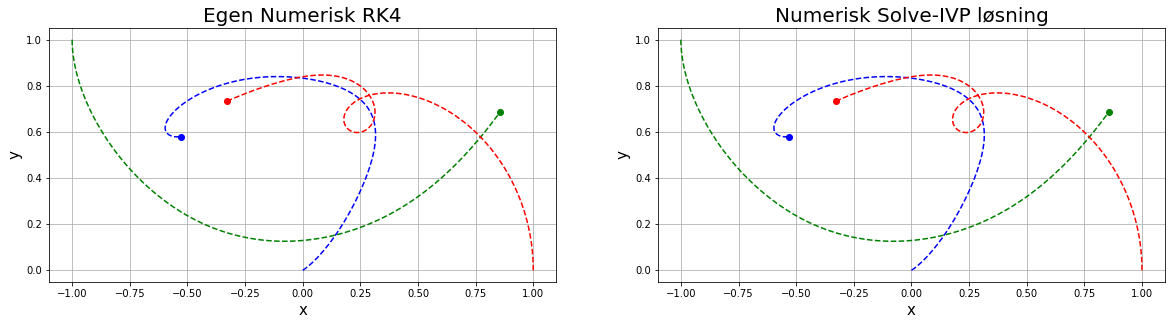

In [22]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].plot(x_1,y_1,ls='--',color='b'), ax[0].plot(x_2,y_2,ls='--',color='g'),ax[0].plot(x_3,y_3,ls='--',color='r'), ax[0].grid(), ax[0].set_title('Egen Numerisk RK4',size=20)
ax[0].plot(x_1[-1],y_1[-1],'o',color='b'), ax[0].plot(x_2[-1],y_2[-1],'o',color='g'), ax[0].plot(x_3[-1],y_3[-1],'o',color='r')
ax[0].set_aspect('equal'), ax[0].set_xlabel('x',size=15),  ax[0].set_ylabel('y',size=15)

ax[1].plot(r1_x,r1_y,ls='--',color='b'), ax[1].plot(r2_x,r2_y,ls='--',color='g'), ax[1].plot(r3_x,r3_y,ls='--',color='r'), ax[1].grid(), ax[1].set_title('Numerisk Solve-IVP løsning',size=20)
ax[1].set_aspect('equal'), ax[1].set_xlabel('x',size=15),  ax[1].set_ylabel('y',size=15)
ax[1].plot(r1_x[-1],r1_y[-1],'o',color='b'), ax[1].plot(r2_x[-1],r2_y[-1],'o',color='g'), ax[1].plot(r3_x[-1],r3_y[-1],'o',color='r')

plt.show()

### 4(5) ordens Fehlberg-Runge-Kutta ###

Der anvendes 4(5)-ordens Fehl:

                                                                    -- Første konstant --

\begin{align}
A_0 &= \Delta t f_2(\vec{r_i}_1,\vec{r_i}_2,\vec{r_i}_3),\quad B_0 = \Delta t f_4(\vec{r_i}_1,\vec{r_i}_2,\vec{r_i}_3)\\
C_0 &= \Delta t f_6(\vec{r_i}_1,\vec{r_i}_2,\vec{r_i}_3),\quad D_0 = \Delta t f_1(\vec{v_i}_1)\\
E_0 &= \Delta t f_3(\vec{v_i}_2),\quad \quad \quad \quad\,\, F_0 = \Delta t f_5(\vec{v_i}_3)\\
\end{align}

                                                                    -- Anden konstant --

\begin{align}
A_1 &= \Delta t f_2\bigg(\vec{r_i}_1+\frac{D_0}{4},\vec{r_i}_2+\frac{E_0}{4},\vec{r_i}_3+\frac{F_0}{4}\bigg),\quad B_1 = \Delta t f_4\bigg(\vec{r_i}_1+\frac{D_0}{4},\vec{r_i}_2+\frac{E_0}{4},\vec{r_i}_3+\frac{F_0}{4}\bigg)\\
C_1 &= \Delta t f_6\bigg(\vec{r_i}_1+\frac{D_0}{4},\vec{r_i}_2+\frac{E_0}{4},\vec{r_i}_3+\frac{F_0}{4}\bigg),\quad D_1 = \Delta t f_1\bigg(\vec{v_i}_1+\frac{A_0}{4}\bigg)\\
E_1 &= \Delta t f_3\bigg(\vec{v_i}_2+\frac{B_0}{4}\bigg),\quad \quad \quad \quad \quad \quad \quad \quad \quad  F_1 = \Delta t f_5\bigg(\vec{v_i}_3+\frac{C_0}{4}\bigg)\\
\end{align}

                                                                    -- Tredje konstant --

\begin{align}
A_2 &= \Delta t f_2\bigg(\vec{r_i}_1+\frac{D_1}{2},\vec{r_i}_2+\frac{E_1}{2},\vec{r_i}_3+\frac{F_1}{2}\bigg),\quad B_2 = \Delta t f_4\bigg(\vec{r_i}_1+\frac{D_1}{2},\vec{r_i}_2+\frac{E_1}{2},\vec{r_i}_+\frac{F_1}{2}3\bigg)\\
C_2 &= \Delta t f_6\bigg(\vec{r_i}_1+\frac{D_1}{2},\vec{r_i}_2+\frac{E_1}{2},\vec{r_i}_3+\frac{F_1}{2}\bigg),\quad D_2 = \Delta t f_1\bigg(\vec{v_i}_1+\frac{A_1}{2}\bigg)\\
E_2 &= \Delta t f_3\bigg(\vec{v_i}_2+\frac{B_1}{2}\bigg),\quad \quad \quad \quad \quad \quad \quad \quad \quad  F_2 = \Delta t f_5\bigg(\vec{v_i}_3+\frac{C_1}{2}\bigg)\\
\end{align}

                                                                    -- Fjerde konstant --

\begin{align}
A_3 &= \Delta t f_2\big(\vec{r_i}_1+D_2,\vec{r_i}_2+E_2,\vec{r_i}_3+F_2\big),\quad B_3 = \Delta t f_4\big(\vec{r_i}_1+D_2,\vec{r_i}_2+E_2,\vec{r_i}_3+F_2\big)\\
C_3 &= \Delta t f_6\big(\vec{r_i}_1+D_2,\vec{r_i}_2+E_2,\vec{r_i}_3+F_2\big),\quad D_3 = \Delta t f_1\big(\vec{v_i}_1+A_2\big)\\
E_3 &= \Delta t f_3\big(\vec{v_i}_2+B_2\big),\quad \quad \quad \quad \quad \quad \quad \quad \quad  F_3 = \Delta t f_5\big(\vec{v_i}_3+C_2\big)\\
\end{align}

og man kan finde step i+1 som:

\begin{align}
\vec{r_{i+1,}}_1 &= \vec{r_i}_1+\frac{1}{6}\bigg(D_0+2D_1+2D_2+D_3\bigg)\\
\vec{r_{i+1,}}_2 &= \vec{r_i}_2+\frac{1}{6}\bigg(E_0+2E_1+2E_2+E_3\bigg)\\
\vec{r_{i+1,}}_3 &= \vec{r_i}_3+\frac{1}{6}\bigg(F_0+2F_1+2F_2+F_3\bigg)\\
\vec{v_{i+1,}}_1 &= \vec{v_i}_1+\frac{1}{6}\bigg(A_0+2A_1+2A_2+A_3\bigg)\\
\vec{v_{i+1,}}_2 &= \vec{v_i}_2+\frac{1}{6}\bigg(B_0+2B_1+2B_2+B_3\bigg)\\
\vec{v_{i+1,}}_3 &= \vec{v_i}_3+\frac{1}{6}\bigg(C_0+2C_1+2C_2+C_3\bigg)\\
\end{align}

In [27]:
### FUNCTION(S) ###
def force_pair1(r1,r2,m2,Grav_const):
    numerator   = r1-r2 
    denominator = norm(r1-r2)**3
    fraction    = numerator/denominator
    return Grav_const*m2*fraction

### dv/dt functions ###
def dvdt1(r_1,r_2,r_3,G,m_1,m_2,m_3):
    first = force_pair1(r_1,r_2,m_2,G)
    second = force_pair1(r_1,r_3,m_3,G)
    return -first-second

def dvdt2(r_1,r_2,r_3,G,m_1,m_2,m_3):
    first = force_pair1(r_2,r_3,m_3,G)
    second = force_pair1(r_2,r_1,m_1,G)
    return -first-second

def dvdt3(r_1,r_2,r_3,G,m_1,m_2,m_3):
    first = force_pair1(r_3,r_1,m_1,G)
    second = force_pair1(r_3,r_2,m_2,G)
    return -first-second

### dr/dt functions ###
def drdt1(v_1):
    return v_1

def drdt2(v_2):
    return v_2

def drdt3(v_3):
    return v_3

### Fehlberg RK4 r_i+1 and v_i+1 functions ###
def r_i1(r_i,k1,k3,k4,k5):
    return r_i+25/216*k1+1408/2565*k3+2197/4194*k4-1/5*k5

def v_i1(v_i,k1,k3,k4,k5):
    return v_i+25/216*k1+1408/2565*k3+2197/4194*k4-1/5*k5

### RK5 r_i+1 and v_i+1 functions ###
def r_2i1(r_i,k1,k3,k4,k5,k6):
    return r_i+16/135*k1+6656/12825*k3+28561/56430*k4-9/50*k5-2/55*k6

def v_2i1(v_i,k1,k3,k4,k5,k6):
    return v_i+16/135*k1+6656/12825*k3+28561/56430*k4-9/50*k5-2/55*k6

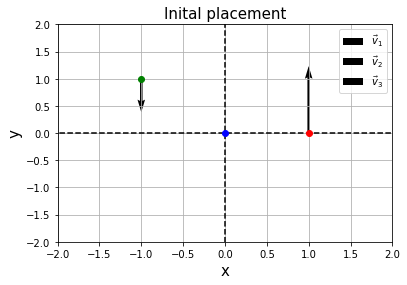

In [47]:
### INITIAL CONDITIONS ###
m1, m2, m3 = 1, 1, 1
Grav_const = 1
r1, r2, r3 = np.array([0,0,0]), np.array([-1,1,0]), np.array([1,0,0])
v1, v2, v3 = np.array([0,0,0]), np.array([0,-0.5,0]), np.array([0,1,0])

### Plotting initial placement ### 
plt.plot(r1[0],r1[1],'o',color='b'), plt.plot(r2[0],r2[1],'o',color='g'), plt.plot(r3[0],r3[1],'o',color='r')
plt.grid(), plt.hlines(0,-100,100,ls='--'),plt.vlines(0,-100,100,ls='--')
plt.quiver(r1[0],r1[1],v1[0],v1[1], scale=5, label = r'$\vec{v}_1$')
plt.quiver(r2[0],r2[1],v2[0],v2[1], scale=5, label = r'$\vec{v}_2$')
plt.quiver(r3[0],r3[1],v3[0],v3[1], scale=5, label = r'$\vec{v}_3$')
plt.xlim(-2,2), plt.ylim(-2,2), plt.xlabel('x',size=15), plt.ylabel('y',size=15)
plt.title('Inital placement', size =15), plt.legend()
plt.show()

In [48]:
#################################################################### NUMERISK RK4 LØSNING ############################################################################


x_1, y_1, z_1 = [], [], []
x_2, y_2, z_2 = [], [], []
x_3, y_3, z_3 = [], [], []

x_1.append(r1[0]),y_1.append(r1[1]),z_1.append(r1[2])
x_2.append(r2[0]),y_2.append(r2[1]),z_2.append(r2[2])
x_3.append(r3[0]),y_3.append(r3[1]),z_3.append(r3[2])

vx_1, vy_1, vz_1 = [], [], []
vx_2, vy_2, vz_2 = [], [], []
vx_3, vy_3, vz_3 = [], [], []

vx_1.append(v1[0]),vy_1.append(v1[1]),vz_1.append(v1[2])
vx_2.append(v2[0]),vy_2.append(v2[1]),vz_2.append(v2[2])
vx_3.append(v3[0]),vy_3.append(v3[1]),vz_3.append(v3[2])

err_r1, err_r2, err_r3 = [], [], []
err_v1, err_v2, err_v3 = [], [], []

counter = 0
for i in range(Nr_steps):
    #### Defining v_i and r_i for all three bodies ###
    r1, r2, r3 = np.array([x_1[i],y_1[i],z_1[i]]), np.array([x_2[i],y_2[i],z_2[i]]), np.array([x_3[i],y_3[i],z_3[i]])
    v1, v2, v3 = np.array([vx_1[i],vy_1[i],vz_1[i]]), np.array([vx_2[i],vy_2[i],vz_2[i]]), np.array([vx_3[i],vy_3[i],vz_3[i]]) 
    
    #### K1 Calculations ####
    A_0, B_0, C_0 = Step_size*dvdt1(r1,r2,r3,G,m1,m2,m3), Step_size*dvdt2(r1,r2,r3,G,m1,m2,m3), Step_size*dvdt3(r1,r2,r3,G,m1,m2,m3)
    D_0, E_0, F_0 = Step_size*drdt1(v1), Step_size*drdt2(v2), Step_size*drdt3(v3)

    #### K2 Calculations ####
    A_1 = Step_size*dvdt1(r1+D_0/4,r2+E_0/4,r3+F_0/4,G,m1,m2,m3)
    B_1 = Step_size*dvdt2(r1+D_0/4,r2+E_0/4,r3+F_0/4,G,m1,m2,m3)
    C_1 = Step_size*dvdt3(r1+D_0/4,r2+E_0/4,r3+F_0/4,G,m1,m2,m3)
    D_1, E_1, F_1 = Step_size*drdt1(v1+A_0/4),  Step_size*drdt2(v2+B_0/4),  Step_size*drdt3(v3+C_0/2)

    #### K3 Calculations ####
    A_2 = Step_size*dvdt1(r1+3*D_0/32+9*D_1/32,r2+3*E_0/32+9*E_1/32,r3+3*F_0/32+9*F_1/32,G,m1,m2,m3)
    B_2 = Step_size*dvdt2(r1+3*D_0/32+9*D_1/32,r2+3*E_0/32+9*E_1/32,r3+3*F_0/32+9*F_1/32,G,m1,m2,m3)
    C_2 = Step_size*dvdt3(r1+3*D_0/32+9*D_1/32,r2+3*E_0/32+9*E_1/32,r3+3*F_0/32+9*F_1/32,G,m1,m2,m3)
    D_2, E_2, F_2 = Step_size*drdt1(v1+3*A_0/32+9*A_1/32),  Step_size*drdt2(v2+3*B_0/32+9*B_1/32),  Step_size*drdt3(v3+3*C_0/32+9*C_1/32)
    
    c1, c2, c3 = 1932/2197, 7200/2197, 7296/2197
    
    #### K4 Calculations ####
    A_3 = Step_size*dvdt1(r1+c1*D_0-c2*D_1+c3*D_2,r2+c1*E_0-c2*E_1+c3*E_2,r3+c1*F_0-c2*F_1+c3*F_2,G,m1,m2,m3)
    B_3 = Step_size*dvdt2(r1+c1*D_0-c2*D_1+c3*D_2,r2+c1*E_0-c2*E_1+c3*E_2,r3+c1*F_0-c2*F_1+c3*F_2,G,m1,m2,m3)
    C_3 = Step_size*dvdt3(r1+c1*D_0-c2*D_1+c3*D_2,r2+c1*E_0-c2*E_1+c3*E_2,r3+c1*F_0-c2*F_1+c3*F_2,G,m1,m2,m3)
    D_3, E_3, F_3 = Step_size*drdt1(v1+c1*A_0-c2*A_1+c3*A_2),  Step_size*drdt2(v2+c1*B_0-c2*B_1+c3*B_2),  Step_size*drdt3(v3+c1*C_0-c2*C_1+c3*C_2)
    
    c1, c2, c3, c4 = 439/216, 8, 3680/513, 845/4104
    
    #### K5 Calculations ####
    A_4 = Step_size*dvdt1(r1+c1*D_0-c2*D_1+c3*D_2-c4*D_3,r2+c1*E_0-c2*E_1+c3*E_2-c4*E_3,r3+c1*F_0-c2*F_1+c3*F_2-c4*F_3,G,m1,m2,m3)
    B_4 = Step_size*dvdt2(r1+c1*D_0-c2*D_1+c3*D_2-c4*D_3,r2+c1*E_0-c2*E_1+c3*E_2-c4*E_3,r3+c1*F_0-c2*F_1+c3*F_2-c4*F_3,G,m1,m2,m3)
    C_4 = Step_size*dvdt3(r1+c1*D_0-c2*D_1+c3*D_2-c4*D_3,r2+c1*E_0-c2*E_1+c3*E_2-c4*E_3,r3+c1*F_0-c2*F_1+c3*F_2-c4*F_3,G,m1,m2,m3)
    D_4, E_4, F_4 = Step_size*drdt1(v1+c1*A_0-c2*A_1+c3*A_2-c4*A_3),  Step_size*drdt2(v2+c1*B_0-c2*B_1+c3*B_2-c4*B_3),  Step_size*drdt3(v3+c1*C_0-c2*C_1+c3*C_2-c4*C_3)
    
    c1, c2, c3, c4, c5 = 8/27, 2, 3544/2565, 1859/4104, 11/40
    
    #### K6 Calculations ####
    A_5 = Step_size*dvdt1(r1-c1*D_0+c2*D_1-c3*D_2+c4*D_3-c5*D_4,r2-c1*E_0+c2*E_1-c3*E_2+c4*E_3-c5*E_4,r3-c1*F_0+c2*F_1-c3*F_2+c4*F_3-c5*F_4,G,m1,m2,m3)
    B_5 = Step_size*dvdt2(r1-c1*D_0+c2*D_1-c3*D_2+c4*D_3-c5*D_4,r2-c1*E_0+c2*E_1-c3*E_2+c4*E_3-c5*E_4,r3-c1*F_0+c2*F_1-c3*F_2+c4*F_3-c5*F_4,G,m1,m2,m3)
    C_5 = Step_size*dvdt3(r1-c1*D_0+c2*D_1-c3*D_2+c4*D_3-c5*D_4,r2-c1*E_0+c2*E_1-c3*E_2+c4*E_3-c5*E_4,r3-c1*F_0+c2*F_1-c3*F_2+c4*F_3-c5*F_4,G,m1,m2,m3)
    D_5, E_5, F_5 = Step_size*drdt1(v1-c1*A_0+c2*A_1-c3*A_2+c4*A_3-c5*A_4),  Step_size*drdt2(v2-c1*B_0+c2*B_1-c3*B_2+c4*B_3-c5*B_4),  Step_size*drdt3(v3-c1*C_0+c2*C_1-c3*C_2+c4*C_3-c5*C_4)
    
    c1, c2, c3, c4 = 25/216, 1408/2565, 2197/4104, 1/5
    
    #### Fehlberg RK4 r:i+1 and v_i+1 calculations ####
    r1_i1, r2_i1, r3_i1 = r_i1(r1,D_0,D_2,D_3,D_4), r_i1(r2,E_0,E_2,E_3,E_4), r_i1(r3,F_0,F_2,F_3,F_4)
    v1_i1, v2_i1, v3_i1 = v_i1(v1,A_0,A_2,A_3,A_4), v_i1(v2,B_0,B_2,B_3,B_4), v_i1(v3,C_0,C_2,C_3,C_4)
    
    #### RK5 r:i+1 and v_i+1 calculations ####
    r12_i1, r22_i1, r32_i1 = r_2i1(r1,D_0,D_2,D_3,D_4,D_5), r_2i1(r2,E_0,E_2,E_3,E_4,E_5), r_2i1(r3,F_0,F_2,F_3,F_4,F_5)
    v12_i1, v22_i1, v32_i1 = v_2i1(v1,A_0,A_2,A_3,A_4,A_5), v_2i1(v2,B_0,B_2,B_3,B_4,B_5), v_2i1(v3,C_0,C_2,C_3,C_4,C_5)
    
    #### Local error estimate ####
    er1, er2, er3 = norm(r1_i1-r12_i1), norm(r2_i1-r22_i1), norm(r3_i1-r32_i1)
    ev1, ev2, ev3 = norm(v1_i1-v12_i1), norm(v2_i1-v22_i1), norm(v3_i1-v32_i1)
    
    #### Appending values ####
    x_1.append(r12_i1[0]),y_1.append(r12_i1[1]),z_1.append(r12_i1[2])
    x_2.append(r22_i1[0]),y_2.append(r22_i1[1]),z_2.append(r22_i1[2])
    x_3.append(r32_i1[0]),y_3.append(r32_i1[1]),z_3.append(r32_i1[2])
    
    vx_1.append(v1_i1[0]),vy_1.append(v1_i1[1]),vz_1.append(v1_i1[2])
    vx_2.append(v2_i1[0]),vy_2.append(v2_i1[1]),vz_2.append(v2_i1[2])
    vx_3.append(v3_i1[0]),vy_3.append(v3_i1[1]),vz_3.append(v3_i1[2])
    
    err_r1.append(er1), err_r2.append(er2), err_r3.append(er3)
    err_v1.append(ev1), err_v2.append(ev2), err_v3.append(ev3)
    
    if round(((i+1)/Nr_steps)*100) > round(((i)/Nr_steps)*100):
        counter += 1
        if counter == 5:
            print(f'{round(((i+1)/Nr_steps)*100)} %')
            counter = 0

5 %
10 %
15 %
20 %
25 %
30 %
35 %
40 %
45 %
50 %
55 %
60 %
65 %
70 %
75 %
80 %
85 %
90 %
95 %
100 %


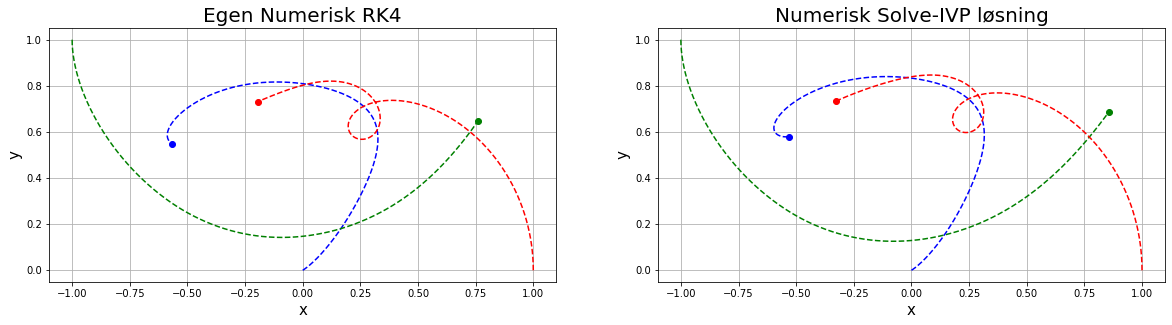

In [49]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].plot(x_1,y_1,ls='--',color='b'), ax[0].plot(x_2,y_2,ls='--',color='g'),ax[0].plot(x_3,y_3,ls='--',color='r'), ax[0].grid(), ax[0].set_title('Egen Numerisk RK4',size=20)
ax[0].plot(x_1[-1],y_1[-1],'o',color='b'), ax[0].plot(x_2[-1],y_2[-1],'o',color='g'), ax[0].plot(x_3[-1],y_3[-1],'o',color='r')
ax[0].set_aspect('equal'), ax[0].set_xlabel('x',size=15),  ax[0].set_ylabel('y',size=15)

ax[1].plot(r1_x,r1_y,ls='--',color='b'), ax[1].plot(r2_x,r2_y,ls='--',color='g'), ax[1].plot(r3_x,r3_y,ls='--',color='r'), ax[1].grid(), ax[1].set_title('Numerisk Solve-IVP løsning',size=20)
ax[1].set_aspect('equal'), ax[1].set_xlabel('x',size=15),  ax[1].set_ylabel('y',size=15)
ax[1].plot(r1_x[-1],r1_y[-1],'o',color='b'), ax[1].plot(r2_x[-1],r2_y[-1],'o',color='g'), ax[1].plot(r3_x[-1],r3_y[-1],'o',color='r')

plt.show()

C:\Users\madse\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


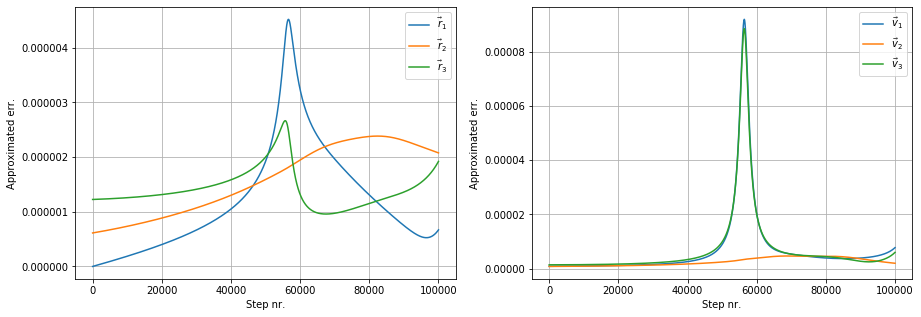

In [50]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(np.arange(1,Nr_steps+1),err_r1, label=r'$\vec{r}_1$'), ax[0].plot(np.arange(1,Nr_steps+1),err_r2,label=r'$\vec{r}_2$'), ax[0].plot(np.arange(1,Nr_steps+1),err_r3,label=r'$\vec{r}_3$')
ax[0].grid(), ax[0].legend(), ax[0].set_xlabel('Step nr.'), ax[0].set_ylabel('Approximated err.')

ax[1].plot(np.arange(1,Nr_steps+1),err_v1, label=r'$\vec{v}_1$'), ax[1].plot(np.arange(1,Nr_steps+1),err_v2,label=r'$\vec{v}_2$'), ax[1].plot(np.arange(1,Nr_steps+1),err_v3,label=r'$\vec{v}_3$')
ax[1].grid(), ax[1].legend(), ax[1].set_xlabel('Step nr.'), ax[1].set_ylabel('Approximated err.')
plt.show()